# Milestone 1: Data Preprocessing, EDA & TF‑IDF
This notebook includes code + explanations.

## Step 1: Import Libraries & Load Dataset

In [18]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

df = pd.read_csv('fake_job_postings.csv')
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HAI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [21]:
import os
os.getcwd()


'c:\\Users\\HAI\\OneDrive\\Attachments\\Desktop\\fakejob'

In [17]:
os.listdir()


['fake_job_postings.csv',
 'Milestone1_Notebook.ipynb',
 'Milestone2_Notebook.ipynb']

## Step 2: Text Cleaning Functions

In [22]:
def remove_html(text):
    if pd.isnull(text): return ''
    return BeautifulSoup(text,'html.parser').get_text()

def clean_special_chars(text):
    text = re.sub(r'[^A-Za-z\s]',' ',text)
    text = re.sub(r'\s+',' ',text)
    return text.strip()

stop_words=set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([w for w in text.split() if w not in stop_words])

## Step 3: Apply Cleaning Pipeline

In [23]:
df['clean_text']=df['description'].apply(remove_html)
df['clean_text']=df['clean_text'].apply(clean_special_chars)
df['clean_text']=df['clean_text'].str.lower()
df['clean_text']=df['clean_text'].fillna('')
df['clean_text']=df['clean_text'].apply(remove_stopwords)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,clean_text
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,food fast growing james beard award winning on...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,organised focused vibrant awesome passion cust...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,client located houston actively seeking experi...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,company esri environmental systems research in...
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,job title itemization review managerlocation f...


In [11]:
df.columns


Index(['df = pd.read_csv('fake_job_postings.csv')'], dtype='object')

## Step 4: EDA – Class Distribution

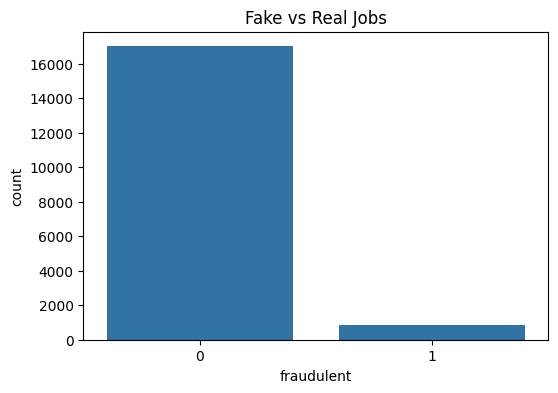

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['fraudulent'])
plt.title('Fake vs Real Jobs')
plt.show()

## Step 5: Word Clouds

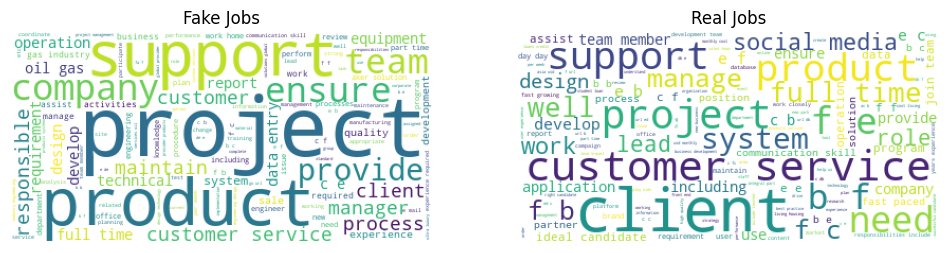

In [25]:
fake_text=' '.join(df[df.fraudulent==1]['clean_text'])
real_text=' '.join(df[df.fraudulent==0]['clean_text'])

wc_fake=WordCloud(background_color='white').generate(fake_text)
wc_real=WordCloud(background_color='white').generate(real_text)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(wc_fake);plt.axis('off');plt.title('Fake Jobs')
plt.subplot(1,2,2)
plt.imshow(wc_real);plt.axis('off');plt.title('Real Jobs')
plt.show()

## Step 6: Text Length Distribution

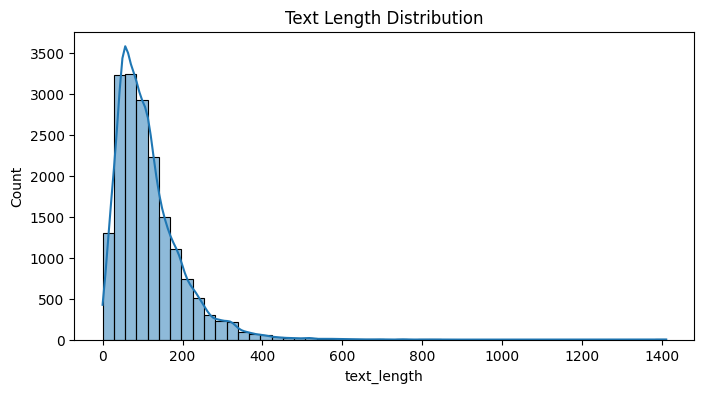

In [26]:
df['text_length']=df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,4))
sns.histplot(df['text_length'],bins=50,kde=True)
plt.title('Text Length Distribution')
plt.show()

## Step 7: TF‑IDF Feature Extraction

In [27]:
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,2),stop_words='english')
X=tfidf.fit_transform(df['clean_text'])
y=df['fraudulent']
X.shape

(17880, 5000)